# Abstract novels

## Setup

In [1]:
import lltk,pickle,os,json, numpy as np
import pandas as pd,numpy as np
from collections import defaultdict

In [2]:
import lltk,os,sys,json,pickle,numpy as np,pandas as pd,gzip,random
from collections import defaultdict
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
def printm(x):
    from IPython.display import display,Markdown
    display(Markdown(x))

In [33]:
cname='CanonFiction'
DEFAULT_FIELD='Abs-Conc.ALL'
DEFAULT_PERIOD='_median'
EXCLUDE_POS_BESIDES={'n','v','j'}
MIN_N_TEXTS=10
PATH_FIELD_JSON=f'data_counts/{cname}'
FIGDIR='figures'
if not os.path.exists(PATH_FIELD_JSON): os.makedirs(PATH_FIELD_JSON)
badmethods={'WN','ALL','Locke','RH'}
# goodmethods={'PAV-Conc','PAV-Imag','MRC-Conc','MRC-Imag','MT','LSN-Perc','LSN-Imag'}
goodmethods={'PAV-Conc','PAV-Imag','MRC-Conc','MRC-Imag','MT','LSN-Perc','LSN-Imag'}
# goodmethods={'MT'}
goodperiods={}#'C17'}#{'_orig'}

In [34]:
cutoff=1600
spcr=40
prebreak_cuts=[1500,1000,0,-1000]
prebreaks=[cutoff - (spcr*(i+1)) for i in range(len(prebreak_cuts))]
breaks=[1600,1700,1800,1900,2000]

def edityear4(y,spcr=spcr,cutoff=cutoff,breaks=prebreak_cuts):
    if y>=cutoff: return y
    for i,brk in enumerate(breaks):
        if y>brk:
            brk0=breaks[i-1] if i-1>=0 else cutoff
            return (cutoff-(spcr*(i+1))) + ((y-brk)/(brk0-brk))*spcr

In [35]:
# countdat
cdf=pd.read_csv(f'data_counts/data.field_counts.{cname}.all_methods_and_periods.csv').set_index('id').dropna()
cdf=cdf[cdf.method.isin(goodmethods)]
if goodperiods: cdf=cdf[cdf.period.isin(goodperiods)]
cdf=cdf.replace([np.inf, -np.inf], np.nan).dropna()
cdf['abs/conc']=[(x/y) if y else np.inf
                 for x,y in zip(cdf['num_abs'],cdf['num_conc'])]# if cdf['num_conc'] else np.nan
# cdf[cdf.period=='_orig']
cdf

,Unnamed: 0,method,period,prefix,total_all,total,num_all,num_abs,perc_abs,num_conc,perc_conc,num_neither,perc_neither,abs/conc
id,,,,,,,,,,,,,,
Addison.Spectator,11,MRC-Conc,C17,Abs-Conc,438116,127005,112789,79716,70.677105,10546,9.350203,22527,19.972692,7.558885
Addison.Spectator,12,MRC-Conc,C18,Abs-Conc,438116,127005,113992,65165,57.166292,16641,14.598393,32186,28.235315,3.915931
Addison.Spectator,13,MRC-Conc,C19,Abs-Conc,438116,127005,114142,72512,63.527886,16928,14.830650,24702,21.641464,4.283554
Addison.Spectator,14,MRC-Conc,_median,Abs-Conc,438116,127005,114979,73041,63.525513,15997,13.912975,25941,22.561511,4.565919
Addison.Spectator,15,MRC-Conc,_orig,Abs-Conc,438116,127005,42926,11416,26.594605,6940,16.167358,24570,57.238038,1.644957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
markmark.du Maurier.The_Kings_General.1692,128434,MRC-Imag,C18,Abs-Conc,132542,36854,32023,8311,25.953221,12975,40.517753,10737,33.529026,0.640539
markmark.du Maurier.The_Kings_General.1692,128435,MRC-Imag,C19,Abs-Conc,132542,36854,32543,9997,30.719356,13719,42.156531,8827,27.124113,0.728697
markmark.du Maurier.The_Kings_General.1692,128436,MRC-Imag,_median,Abs-Conc,132542,36854,32599,9520,29.203350,13320,40.860149,9759,29.936501,0.714715


In [36]:
cdf.groupby(['method','period']).median().reset_index()

,method,period,Unnamed: 0,total_all,total,num_all,num_abs,perc_abs,num_conc,perc_conc,num_neither,perc_neither,abs/conc
0,LSN-Perc,C17,64148,81424,24930,20968,9696,46.985244,4596,22.983898,6070,29.757239,2.034653
1,LSN-Perc,C18,64149,81424,24930,21530,6775,31.424668,7058,34.523907,7099,33.248165,0.912297
2,LSN-Perc,C19,64150,81424,24930,21895,8591,39.197267,6866,32.972829,5805,26.941336,1.187935
3,LSN-Perc,C20,64153,81424,24930,21380,7827,36.380910,7546,36.900033,5466,25.919032,0.992176
4,LSN-Perc,_median,64151,81424,24930,22009,7962,36.063570,7039,33.543687,6366,29.376452,1.077627
5,LSN-Perc,_orig,64152,81424,24930,17963,1722,9.757828,5451,31.023571,10650,59.197674,0.314736
6,MRC-Conc,C17,64124,81424,24930,20968,11780,56.877654,3236,16.210556,5364,26.691500,3.520671
7,MRC-Conc,C18,64125,81424,24930,21529,9205,42.608606,4943,23.791566,6860,32.449099,1.813492
8,MRC-Conc,C19,64126,81424,24930,21895,10541,48.428316,5253,25.026834,5530,25.858281,1.932731
9,MRC-Conc,C20,64129,81424,24930,21380,11131,53.028149,4564,22.162188,5091,24.461858,2.388659


In [37]:
cdf.method.value_counts()

PAV-Imag    10842
MRC-Imag    10842
PAV-Conc    10842
MRC-Conc    10842
LSN-Perc    10842
MT          10842
Name: method, dtype: int64

In [38]:
cdf.period.value_counts()

C18        10842
_median    10842
C20        10842
C17        10842
_orig      10842
C19        10842
Name: period, dtype: int64

In [39]:
# cdf[['method','period','perc_conc','perc_abs','perc_neither','abs/conc']]#.groupby(['method','period'])#.apply(zscore,1)

In [40]:
## Attach metadata
meta=lltk.load(cname).metadata.set_index('id')
# meta

In [41]:
alldf = cdf.reset_index().groupby('id').mean().join(meta,rsuffix='_meta').fillna('') #,how='inner')
alldf['major_genre']=alldf['major_genre'].apply(lambda x: x if x else 'Unknown')
# alldf['century']=alldf['year'].apply(lambda y: f'C{int(y//100)+1}' if y>1485 else 'Pre-print')
alldf['year0']=alldf.year
alldf['year']=alldf.year.apply(edityear4)

# alldf.query('1500<year0<1600')[['year','year0','canon_genre','major_genre','abs/conc']].sort_values('abs/conc')
alldf

,Unnamed: 0,total_all,total,num_all,num_abs,perc_abs,num_conc,perc_conc,num_neither,perc_neither,...,nation,note,notes,num_words,ocr_accuracy,source,subcorpus,corpus,_lltk_,year0
id,,,,,,,,,,,,,,,,,,,,,
Addison.Spectator,38.5,438116.0,127005.0,102754.027778,57853.083333,53.331797,16618.722222,16.464915,28282.222222,30.203288,...,,,,,,,,CanonFiction,canon_fiction|Addison.Spectator,1711
Ammianus.History,109.5,233658.0,74704.0,61898.055556,33331.333333,50.679009,10088.527778,16.496448,18478.194444,32.824544,...,,,,,,,,CanonFiction,canon_fiction|Ammianus.History,391
AngloSaxon.Beowulf,180.5,28189.0,9141.0,6878.694444,2117.527778,29.444821,2128.222222,30.760942,2632.944444,39.794237,...,,,,,,,,CanonFiction,canon_fiction|AngloSaxon.Beowulf,1000
AngloSaxon.Dream of the Rood,251.5,1444.0,486.0,364.805556,137.722222,36.187524,100.111111,27.366875,126.972222,36.445601,...,,,,,,,,CanonFiction,canon_fiction|AngloSaxon.Dream of the Rood,900
Anon.1001Nights.1914,322.5,82380.0,23180.0,18654.416667,7161.916667,36.245608,5620.611111,30.434065,5871.888889,33.320327,...,,,,,,,,CanonFiction,canon_fiction|Anon.1001Nights.1914,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
markmark.de Lint.The_Little_Country.1688,128122.5,196466.0,55224.0,41549.000000,11981.611111,27.558975,16091.722222,38.801184,13475.666667,33.639840,...,Canadian,,,210465,0.768893,,,CanonFiction,canon_fiction|markmark.de Lint.The_Little_Coun...,1991
markmark.de Lint.Trader.1689,128193.5,165434.0,42535.0,31582.861111,9422.750000,28.649680,12242.166667,38.476713,9917.944444,32.873607,...,Canadian,,seventh book published in the Newford series,176680,0.784265,,,CanonFiction,canon_fiction|markmark.de Lint.Trader.1689,1997
markmark.de Lint.Yarrow.1690,128264.5,87659.0,25708.0,19647.750000,5146.611111,24.955500,8308.000000,42.604030,6193.138889,32.440470,...,Canadian,,,96033,0.808743,,,CanonFiction,canon_fiction|markmark.de Lint.Yarrow.1690,1989


## Explore

In [42]:
# def zscore(col):
#     return [(x - col.std())/col.mean() for x in col]

# for col in tqdm(['perc_abs','perc_conc','abs/conc']):
#     alldf[col+'_z']=zscore(alldf[col])
# alldf

In [43]:
alldf=alldf[(alldf['canon_genre']!="") | (alldf['corpus_source']!="")]
alldf.loc[alldf['canon_genre'].str.strip()=="", "major_genre"]="Unknown"
alldf

,Unnamed: 0,total_all,total,num_all,num_abs,perc_abs,num_conc,perc_conc,num_neither,perc_neither,...,nation,note,notes,num_words,ocr_accuracy,source,subcorpus,corpus,_lltk_,year0
id,,,,,,,,,,,,,,,,,,,,,
Addison.Spectator,38.5,438116.0,127005.0,102754.027778,57853.083333,53.331797,16618.722222,16.464915,28282.222222,30.203288,...,,,,,,,,CanonFiction,canon_fiction|Addison.Spectator,1711
AngloSaxon.Beowulf,180.5,28189.0,9141.0,6878.694444,2117.527778,29.444821,2128.222222,30.760942,2632.944444,39.794237,...,,,,,,,,CanonFiction,canon_fiction|AngloSaxon.Beowulf,1000
AngloSaxon.Dream of the Rood,251.5,1444.0,486.0,364.805556,137.722222,36.187524,100.111111,27.366875,126.972222,36.445601,...,,,,,,,,CanonFiction,canon_fiction|AngloSaxon.Dream of the Rood,900
Anon.1001Nights.1914,322.5,82380.0,23180.0,18654.416667,7161.916667,36.245608,5620.611111,30.434065,5871.888889,33.320327,...,,,,,,,,CanonFiction,canon_fiction|Anon.1001Nights.1914,900
Anon.Everyman,393.5,43476.0,13371.0,8360.833333,3379.388889,39.129684,1844.277778,21.947694,3137.166667,38.922622,...,,,,,,,,CanonFiction,canon_fiction|Anon.Everyman,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
markmark.de Lint.The_Little_Country.1688,128122.5,196466.0,55224.0,41549.000000,11981.611111,27.558975,16091.722222,38.801184,13475.666667,33.639840,...,Canadian,,,210465,0.768893,,,CanonFiction,canon_fiction|markmark.de Lint.The_Little_Coun...,1991
markmark.de Lint.Trader.1689,128193.5,165434.0,42535.0,31582.861111,9422.750000,28.649680,12242.166667,38.476713,9917.944444,32.873607,...,Canadian,,seventh book published in the Newford series,176680,0.784265,,,CanonFiction,canon_fiction|markmark.de Lint.Trader.1689,1997
markmark.de Lint.Yarrow.1690,128264.5,87659.0,25708.0,19647.750000,5146.611111,24.955500,8308.000000,42.604030,6193.138889,32.440470,...,Canadian,,,96033,0.808743,,,CanonFiction,canon_fiction|markmark.de Lint.Yarrow.1690,1989


In [44]:
alldf['dec']=[x//10*10 for x in alldf['year']]
dfplot=alldf.groupby(['major_genre','canon_genre','author']).agg({
    'year':np.median,
    'num_abs':sum,
    'num_conc':sum,
    'num_all':sum,
    'num_neither':sum,
    'perc_conc':np.median,
    'perc_abs':np.median,
    'perc_neither':np.median,
    'abs/conc':np.median
}).reset_index()
dfplot

,major_genre,canon_genre,author,year,num_abs,num_conc,num_all,num_neither,perc_conc,perc_abs,perc_neither,abs/conc
0,Allegory,Bunyan,"Bunyan, John, 1628-1688",1682.0,17119.222222,8659.666667,39245.277778,13466.388889,22.099902,41.568637,36.331461,2.296158
1,Allegory,“Piers Plowman”,,1549.6,2596.861111,1254.833333,5832.972222,1981.277778,21.474701,42.625842,35.899457,2.211250
2,Dialogue,Dialogue,"Breton, Nicholas, 1545?-1626?",1635.0,3607.138889,1906.638889,9038.277778,3524.500000,20.791814,39.169995,40.038191,2.338379
3,Dialogue,Erasmus,Erasmus,1563.6,6122.638889,1422.777778,10061.750000,2516.333333,14.076402,58.312345,27.611253,4.682446
4,Dialogue,Socratic dialogues,Plato,1465.0,46682.777778,6349.138889,69820.250000,16788.333333,9.207072,64.157471,26.635457,8.384314
...,...,...,...,...,...,...,...,...,...,...,...,...
671,Verse,Shakespeare,Shakespeare,1597.4,2674.583333,2197.083333,7672.500000,2800.833333,29.121377,32.716001,38.162622,1.437880
672,Verse,Spenser,Spenser,1596.0,3141.222222,3023.527778,10209.805556,4045.055556,28.413323,30.023377,41.563299,1.302498
673,Verse,“Dream of the Rood”,,1516.0,137.722222,100.111111,364.805556,126.972222,27.366875,36.187524,36.445601,1.510393
674,Verse,“Knight’s Tale”,Chaucer,1552.0,1322.750000,1178.500000,3886.583333,1385.333333,29.740641,33.030905,37.228454,1.270197


## Plotting

In [45]:
colors = {'Allegory': '#33a02c',
 'Dialogue': '#1f78b4',
 'Epic': '#b2df8a',
 'Novel': '#a6cee3',
 'Novella': '#fb9a99',
 'Other': '#e31a1c',
 'Pastoral': '#fdbf6f',
 'Picaresque': '#ff7f00',
 'Romance': '#cab2d6',
 'Satire': '#6a3d9a',
 'Tale': '#94945a',
 'Unknown': 'gray',
 'Verse':'#b15928'}

In [46]:
shapes =  {'Allegory': 'd',
 'Dialogue': '8',
 'Epic': '<',
 'Novel': 'o',
 'Novella': 'v',
 'Other': 'h',
 'Pastoral': 'D',
 'Picaresque': '>',
 'Romance': 's',
 'Satire': 'x',
 'Tale': '+',
 'Unknown': '.',
 'Verse':'*'}

In [168]:
# interactive
import plotnine as p9
from scipy.stats import zscore
import math
from plotnine import *
factor=2.5

valtype2label={
#     'abs/conc':'<< Concrete words | Abstract words >>',
    'abs/conc':'Frequency of abstract words per 1 concrete word',
    'abs':'% Abstract Words',
    'conc':'% Concrete Words',
    'neither':'% words neither abstract nor concrete',   
}

facet2label = {
    'abs':'Abstract words',
    'conc':'Concrete words',
    'abs/conc':'Abstact / Concrete word ratio'
}


adjust_text_dict = {
    'expand_points': (0, 0),
}

def plot_fiction(
        df=dfplot,
        corpora=[cname],
        field=DEFAULT_FIELD,
        period=DEFAULT_PERIOD,
        color_by='major_genre',
        facet_by='',
        shape_by='major_genre',
        label_by='canon_genre',
        wrap_facet=True,
        valtype='abs/conc',
        color=True,
        span=0.2,
        alpha=1,
        minval=None,
        maxval=None,
        width=9 * factor,
        height=7 * factor,#5.8 * factor,
        dotsize=3,
        standardize=False,
        smooth=True,
        title='',
        save_to=True,
        minyear=0,
        font_size=10,
        jitter=False,
        log_y=False,
        rby=5,
        zrby=0.5,
        highlights=[],
        min_y=None,
        max_y=None,
        spcr=0.5):
    
    # get value
    if valtype=='abs/conc':
        df['value'] = df['abs/conc'] #df['num_abs'] / df['num_conc']
#         df['value'] = 1/df['abs/conc'] ### making it conc/abs!
    elif valtype=='abs':
        df['value'] = df['perc_abs'] #df['num_abs'] / df['num_all'] * 100
    elif valtype=='conc':
        df['value'] = df['perc_conc'] #df['num_conc'] / df['num_all'] * 100
    elif valtype=='neither':
        df['value'] = df['perc_neither'] #df['num_neither'] / df['num_all'] * 100
    else:
        return
    df['value'] = df['value'].apply(lambda y: y if y>min_y else (min_y+((y-min_y)*spcr)))
    df['value'] = df['value'].apply(lambda y: y if y<max_y else max_y)#(max_y+((y-max_y)*(1+spcr))))

    
    # standardize?
    df['zvalue']=zscore([
        np.log10(x) if log_y else x
        for x in df['value']
    ])
    
    ## min max z?
    def padz(z,maxz=2.05,minz=-2.05):
        if z<minz: return minz
        if z>maxz: return maxz
        return z
    df=df.fillna(0)
    df['zvalue'] = df['zvalue'].apply(padz)
    
    df['zbin']=[f'{x//zrby*zrby}' for x in df['zvalue']]
    df['bin']=[f'{str(int(x)).zfill(2)}-{str(int(x+rby)).zfill(2)}' for x in df['value']//rby*rby]# if not standardize else df['value']#int(round(df['value']))
    if standardize: df['value']=df['zvalue']
    df['year']=df.year.apply(lambda y: y if y>minyear else minyear)
    minyear=df['year'].min()
    maxyear=df['year'].max()
    
    if width and height: p9.options.figure_size=(width,height)
    
    # minmax

    # plot
    aes_args={'x':'year','y':'value'}
    if color_by: aes_args['color']=color_by
    if shape_by: aes_args['shape']=shape_by
    aesth=aes(**aes_args)
    
    # start figure
    fig = ggplot(df,aesth)
#     fig+=annotation_stripes(direction='horizontal',fill=['#e3e3e3','#f0f0f0'])
    fig+=theme_classic() 
    fig+=scale_color_manual(colors,show_legend=True,guide='legend')
    fig+=scale_shape_manual(shapes,show_legend=True,guide='legend')
    fig+=scale_x_continuous(
        breaks=prebreaks+breaks,
        labels=[(f'{x*-1} BC' if x<0 else f'{x} AD') if x<=0 else str(x)
                for x in prebreak_cuts+breaks],
    )
    fig+=geom_vline(xintercept=breaks,color='silver')
    fig+=geom_vline(xintercept=prebreaks,color='silver')
    
    

    

    
    
    # set vals
    minval=df['value'].min() if min_y is None else min_y
    maxval=df['value'].max() if max_y is None else max_y
    medianval=df['value'].median()
    stdval=df['value'].std()
    if not standardize:
        fig+=scale_y_continuous(breaks=list(range(0,100,10)))
        if valtype!='abs/conc':
            pass
#             fig+=geom_hline(yintercept = medianval, show_legend=False, color='gray')
#             fig+=geom_hline(yintercept = [10,20,30,40,50], show_legend=False, color='silver')
        else:
            fig+=geom_hline(yintercept = 1, show_legend=False)
        if (minval is not None and maxval is not None):
            fig+=ylim(minval,maxval)
    else:
        fig+=ylim(minval,maxval)# if (minval is None or maxval is None) else ylim(minval,maxval)
        fig+=geom_hline(yintercept = 0.0, show_legend=False)
        
    if dotsize:
        fig+=geom_point(alpha=0.8,size=2,data=df)#b3b3b3')#,show_legend=False)
    
    # labels
    ylabel=valtype2label.get(valtype,valtype)
    def label2facet(x): return facet2label.get(x,x)
    if facet_by: fig+=facet_wrap(facet_by, labeller=label2facet)
    if title: fig+=ggtitle(title)
    if label_by:
        aesd={
            'x':'year',
            'y':'value',
            'label':label_by,
            'guide':False
        }
        dfq=df[(df[label_by]!="") & (df[shape_by]!="" if shape_by else 1)].groupby([x for x in {shape_by,label_by,color_by} if x]).median().reset_index()
        fig+=geom_point(alpha=alpha,size=5,data=dfq)
        if highlights:
            dfl,dfh = dfq[~dfq[label_by].isin(highlights)],dfq[dfq[label_by].isin(highlights)]
        else:
            dfl,dfh = dfq,None
        if not jitter:
            fig+=geom_text(aes(**aesd),inherit_aes=False,data=dfl)#,adjust_text=adjust_text_dict)
        else:
            fig+=geom_text(aes(**aesd),inherit_aes=False,adjust_text=adjust_text_dict,data=dfl)    
        if dfh is not None:
            fig+=geom_text(aes(**aesd),fontweight='bold',color='black',data=dfh)
    
    fig+=ylab(ylabel)
    fig+=xlab('Year')
    fig+=guides(fill = False)#, color = True, linetype = False, shape = False)
    
    if log_y:
        if valtype!='abs/conc':
            fig+=scale_y_log10()
        else:
            fbrks=[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]
            fig+=scale_y_continuous(trans='log2',breaks=[_x/10 for _x in fbrks])
    else:
        if valtype !='abs/conc':
#             fig+=scale_y_continuous(breaks=list(range(0,105,5)))
            fig+=scale_y_continuous(breaks=[0,10,20,30,40,50,60,70,80,90,100])
            
    if smooth:
        fig+=geom_smooth(
            aes(x='year',y='value'),
            inherit_aes=False,
            span=span,
            se=True,
            method='loess',
            alpha=0.15,
            color='gray',
            data=df
        )
    
    if save_to:
        if save_to is True:
            save_to=os.path.join(FIGDIR, f'fig.absrealism.{corpora[0]}.{field}.{period}.{valtype.replace("/","_")}{".clean" if jitter else ""}.v26.png')
            
        save_to_dir=os.path.dirname(save_to)
        if not os.path.exists(save_to_dir):
            os.makedirs(save_to_dir)
        fig.save(save_to)
    
    return fig



## Plots

In [169]:
JITTER=0

In [170]:
## Combos

def do_plot_fiction(**x):
    args={
        **dict(
            valtype='abs/conc',
            title='Prevalence of abstract vs. concrete words across history of fictional canon',
            jitter=0,
            standardize=False,
            log_y=False,
            color_by='major_genre',
#             color_by=None,
#             color_by='annotated',
            highlights={'Austen','Cusk'},
        ),
        **x
    }
    return plot_fiction(**args)

In [171]:
# import seaborn as sns
# pal = sns.color_palette('Paired', 12)
# hexes=list(pal.as_hex())
# pal.as_hex()

In [172]:
# for i,c in enumerate(colors): colors[c]=hexes[i]
# colors

In [173]:
# do_plot_fiction(valtype='abs/conc',title='Ratio of abstract to concrete words in fiction',
#                 max_y=10,min_y=0.15)
# do_plot_fiction(valtype='abs/conc',title='Ratio of abstract to concrete words in fiction',
#                 max_y=11,min_y=0.3,jitter=1)

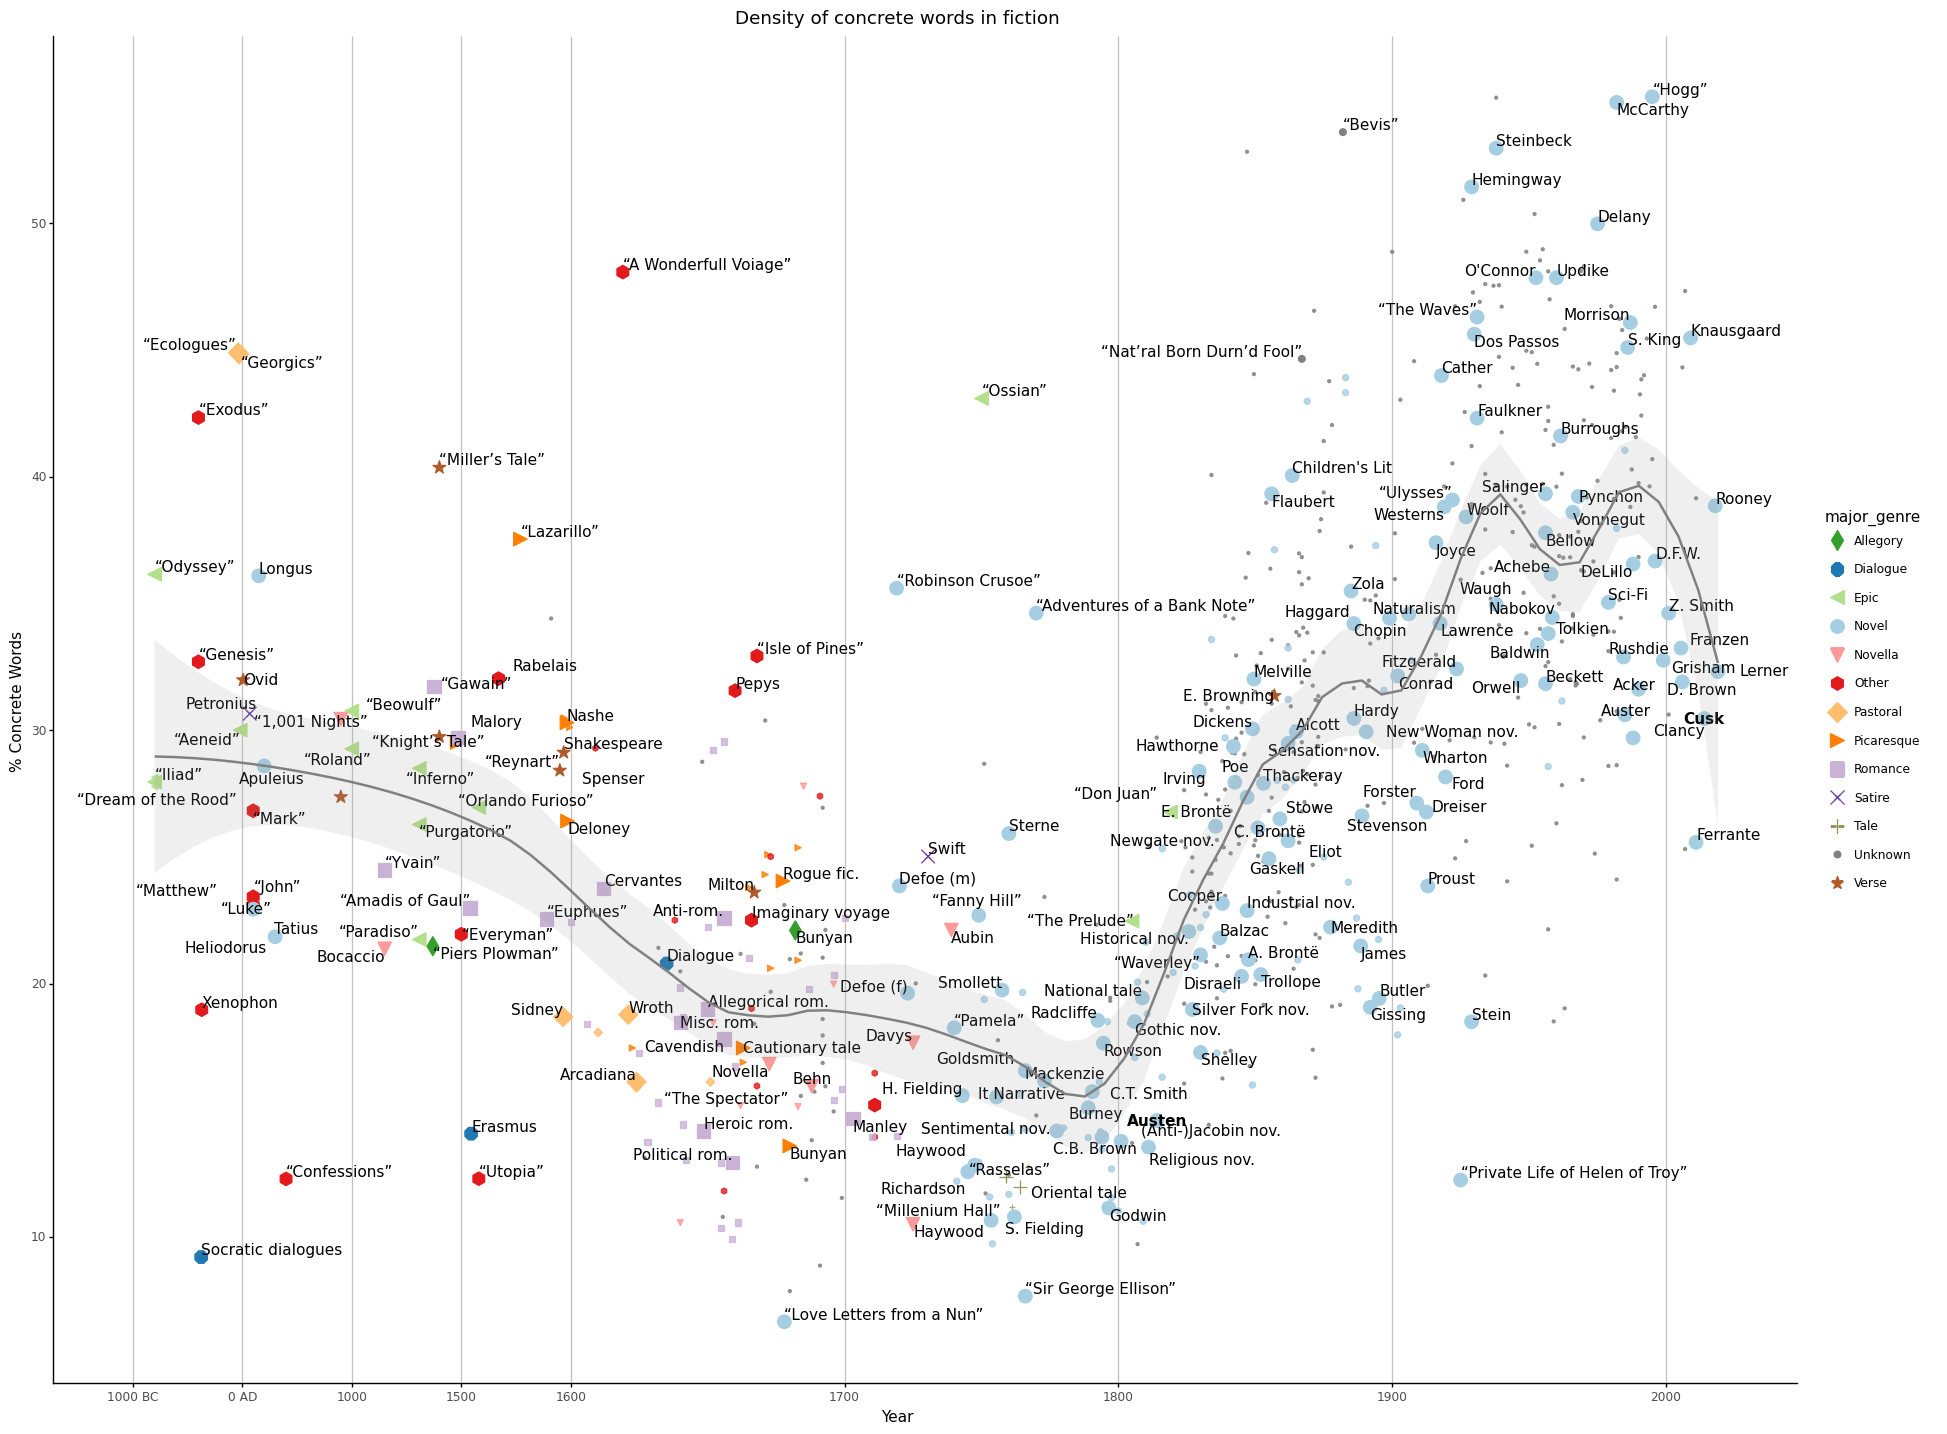

<ggplot: (8753651232941)>

In [181]:
do_plot_fiction(
    valtype='conc',
    title='Density of concrete words in fiction',
    min_y=0,
    max_y=55,
    jitter=1
)

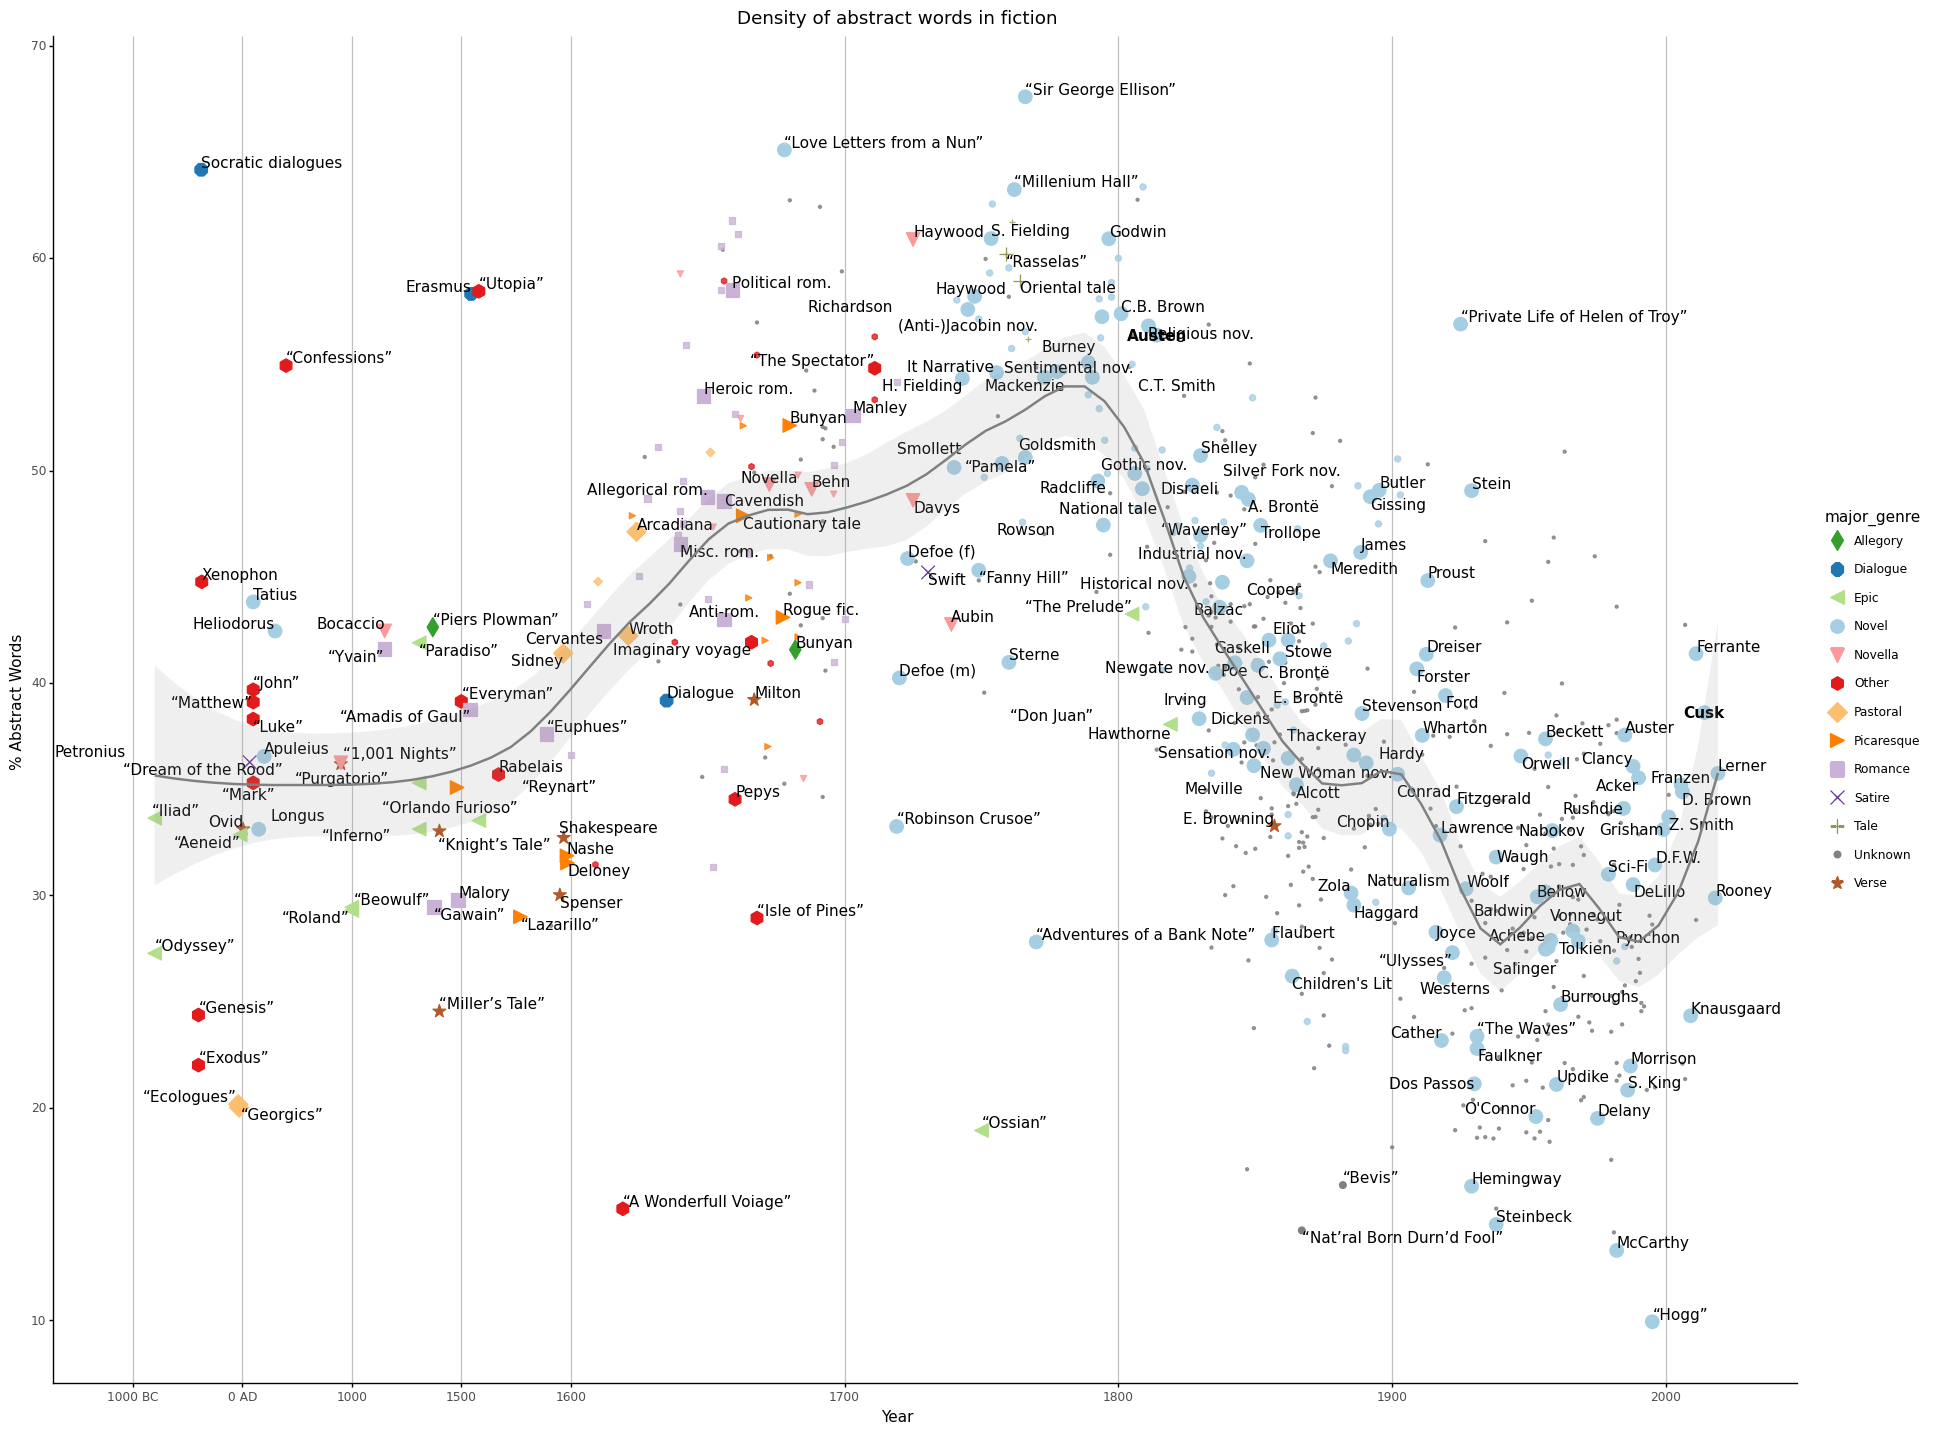

<ggplot: (8753653448301)>

In [182]:
do_plot_fiction(
    valtype='abs',
    title='Density of abstract words in fiction',
    min_y=11,
    max_y=69,
    jitter=1
)

In [166]:
# do_plot_fiction(valtype='abs',title='Proportion of words concrete',
#                 max_y=60,min_y=0,log_y=False,jitter=1)

In [183]:
# do_plot_fiction(valtype='neither',title='Ratio of abstract to concrete words in fiction',
#                 max_y=60,min_y=0,log_y=False)

In [184]:
# do_plot_fiction(valtype='conc',title='Density of concrete language in fiction',log_y=False,span=.2)
# do_plot_fiction(valtype='conc',title='Density of concrete language in fiction',log_y=False,jitter=1)

In [185]:
# do_plot_fiction(valtype='abs',title='Density of abstract language in fiction',log_y=False,span=.2)
# do_plot_fiction(valtype='abs',title='Density of abstract language in fiction',log_y=False,jitter=1)

In [29]:
# do_plot_fiction(valtype='neither',title='Density of neutral language in fiction',log_y=False)

In [30]:
# ## Combos

# # both
# printm('### Abstract/Concrete ratio (clean)')
# display(plot_fiction(
#     df=dfq,
#     valtype='abs/conc',
# #     title='Ratio of abstract to concrete words across fictional canon',
#     title='Prevalence of abstract vs. concrete words across history of fictional canon',
#     jitter=1,
#     standardize=False,
#     log_y=True,
#     color_by=None
    
# ))
# printm('----')


In [31]:
# # Concrete
# printm('## Plots')
# printm('### Concrete words')
# display(plot_fiction(
#     df=dfq,
#     valtype='conc',
#     title='Prevalence of concrete words across fictional canon',
#     jitter=JITTER,
# ))
# printm('----')

# # Abstract
# printm('### Abstract words')
# display(plot_fiction(
#     df=dfq,
#     valtype='abs',
#     title='Prevalence of abstract words across fictional canon',
#     jitter=JITTER
# ))
# printm('----')

# # neither
# printm('### Neutral words')
# display(plot_fiction(
#     df=dfq,
#     valtype='neither',
#     title='Prevalence of neutral words across fictional canon',
#     jitter=JITTER
# ))
# printm('----')